# GARCH (Generalized Autoregressive Conditional Heteroskedasticity)

The GARCH model is an econometric model that captures the time-varying volatility or variance of a time series. It assumes that the volatility of the series is autocorrelated and can be predicted based on past values of the series and past volatility.

The basic form of the GARCH(p, q) model is:

```
𝜎_{𝑡}^2 = 𝜔 + 𝛼_{1}⋅𝜀_{𝑡−1}^2 + … + 𝛼_{𝑝}⋅𝜀_{𝑡−𝑝}^2 + 𝛽_{1}⋅𝜎_{𝑡−1}^2 + … + 𝛽_{𝑞}⋅𝜎_{𝑡−𝑞}^2
```

Where:

- \( 𝜎_{𝑡}^2 \) is the conditional variance at time \( 𝑡 \),
- \( 𝜔 \) is the constant term,
- \( 𝜀_{𝑡} \) is the error term at time \( 𝑡 \),
- \( 𝛼_{𝑖} \) and \( 𝛽_{𝑖} \) are the coefficients for the squared error terms and the conditional variances at lag \( 𝑖 \) respectively,
- \( 𝑝 \) and \( 𝑞 \) are the orders of the autoregressive and moving average terms respectively.






In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import arch
import matplotlib.pyplot as plt
from arch.unitroot import ADF

In [2]:
# Define the assets
assets = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA', 'SPY', 'AGG', 'PSP', 'VNQ', 'SLV', 'GLD', 'USO', 'DJI']
cryptos = ['BTC-USD', 'ETH-USD', 'SOL-USD', 'BNB-USD', 'XRP-USD', 'TON-USD', 'DOGE-USD', 'ADA-USD', 'SHIB-USD', 'AVAX-USD']
index = ['BITW']

# Combine all assets into one list
all_assets = assets + cryptos + index

# Define the start and end dates
start_date = '2022-01-01'
end_date = '2024-01-01'

# Download data for all the assets
data = yf.download(all_assets, start=start_date, end=end_date)

[*********************100%%**********************]  24 of 24 completed


In [3]:
# Close prices
prices = data['Adj Close']

# Calculate daily returns
returns = prices.pct_change().dropna()


/var/folders/sd/j5p08m515kd7n9549lkkz_q40000gn/T/ipykernel_58258/1127329405.py:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change().dropna()


In [4]:
# Initialize dictionaries to store results
aic_values = {}
bic_values = {}
residuals_std = {}
adf_pvalues = {}
forecast_errors = {}

/Users/ephraim888sun/.pyenv/versions/3.9.6/lib/python3.9/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002303. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/var/folders/sd/j5p08m515kd7n9549lkkz_q40000gn/T/ipykernel_58258/2632220824.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_errors[asset] = forecast.variance.iloc[-1] - returns[asset][-1]**2
/Users/ephraim888sun/.pyenv/versions/3.9.6/lib/python3.9/site-packages/arch/univariate/base.py:311: DataScaleWarning:


Summary for AAPL:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   AAPL   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2056.07
Distribution:                  Normal   AIC:                          -4104.14
Method:            Maximum Likelihood   BIC:                          -4085.79
                                        No. Observations:                  727
Date:                Fri, May 24 2024   Df Residuals:                      726
Time:                        15:50:20   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         8.9662e-04  2.310e-05     38

/Users/ephraim888sun/.pyenv/versions/3.9.6/lib/python3.9/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003314. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/var/folders/sd/j5p08m515kd7n9549lkkz_q40000gn/T/ipykernel_58258/2632220824.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_errors[asset] = forecast.variance.iloc[-1] - returns[asset][-1]**2
/Users/ephraim888sun/.pyenv/versions/3.9.6/lib/python3.9/site-packages/arch/univariate/base.py:311: DataScaleWarning:

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   TSLA   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1491.62
Distribution:                  Normal   AIC:                          -2975.23
Method:            Maximum Likelihood   BIC:                          -2956.88
                                        No. Observations:                  727
Date:                Fri, May 24 2024   Df Residuals:                      726
Time:                        15:50:20   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         4.4969e-05  1.129e-03  3.982e-02      0.968 

/var/folders/sd/j5p08m515kd7n9549lkkz_q40000gn/T/ipykernel_58258/2632220824.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_errors[asset] = forecast.variance.iloc[-1] - returns[asset][-1]**2
/Users/ephraim888sun/.pyenv/versions/3.9.6/lib/python3.9/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002079. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/var/folders/sd/j5p08m515kd7n9549lkkz_q40000gn/T/ipykernel_58258/2632220824.py:30: FutureWarning: Series.__getitem__ 


Summary for GLD:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                    GLD   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2534.65
Distribution:                  Normal   AIC:                          -5061.31
Method:            Maximum Likelihood   BIC:                          -5042.95
                                        No. Observations:                  727
Date:                Fri, May 24 2024   Df Residuals:                      726
Time:                        15:50:20   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.0540e-04  1.531e-04     

/var/folders/sd/j5p08m515kd7n9549lkkz_q40000gn/T/ipykernel_58258/2632220824.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_errors[asset] = forecast.variance.iloc[-1] - returns[asset][-1]**2
/Users/ephraim888sun/.pyenv/versions/3.9.6/lib/python3.9/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001326. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/var/folders/sd/j5p08m515kd7n9549lkkz_q40000gn/T/ipykernel_58258/2632220824.py:30: FutureWarning: Series.__getitem__ tr


Summary for SOL-USD:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                SOL-USD   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1105.57
Distribution:                  Normal   AIC:                          -2203.14
Method:            Maximum Likelihood   BIC:                          -2184.78
                                        No. Observations:                  727
Date:                Fri, May 24 2024   Df Residuals:                      726
Time:                        15:50:21   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         6.3999e-04  1.731e-03 

/var/folders/sd/j5p08m515kd7n9549lkkz_q40000gn/T/ipykernel_58258/2632220824.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_errors[asset] = forecast.variance.iloc[-1] - returns[asset][-1]**2
/Users/ephraim888sun/.pyenv/versions/3.9.6/lib/python3.9/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002118. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/var/folders/sd/j5p08m515kd7n9549lkkz_q40000gn/T/ipykernel_58258/2632220824.py:30: FutureWarning: Series.__getitem__ tr


Summary for DOGE-USD:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:               DOGE-USD   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1304.12
Distribution:                  Normal   AIC:                          -2600.24
Method:            Maximum Likelihood   BIC:                          -2581.88
                                        No. Observations:                  727
Date:                Fri, May 24 2024   Df Residuals:                      726
Time:                        15:50:21   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -4.8537e-05  1.440

/var/folders/sd/j5p08m515kd7n9549lkkz_q40000gn/T/ipykernel_58258/2632220824.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_errors[asset] = forecast.variance.iloc[-1] - returns[asset][-1]**2


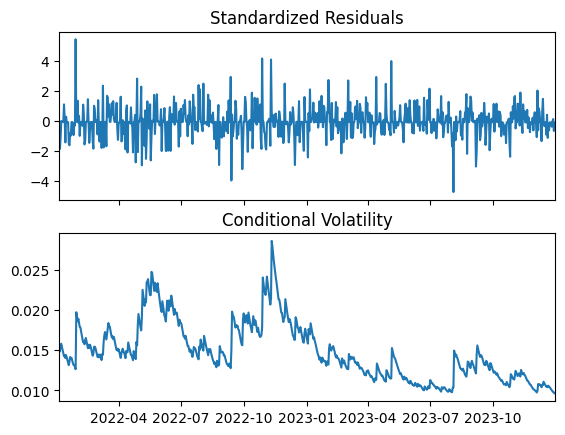

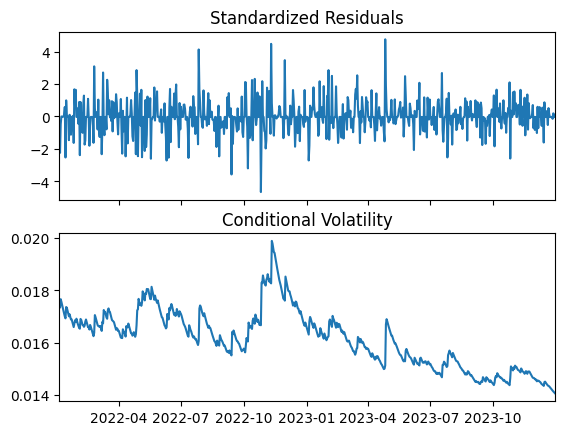

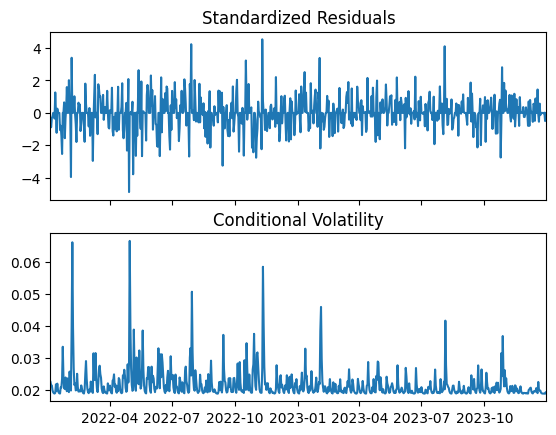

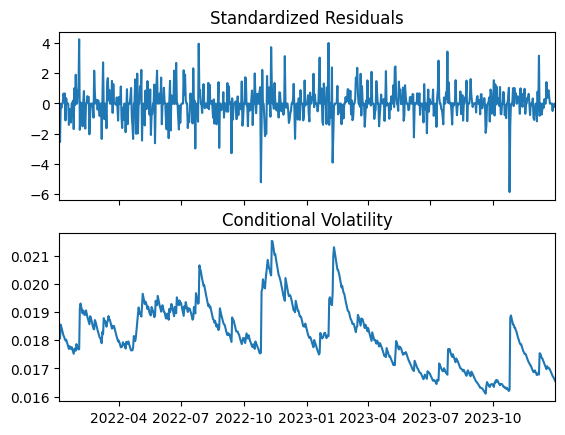

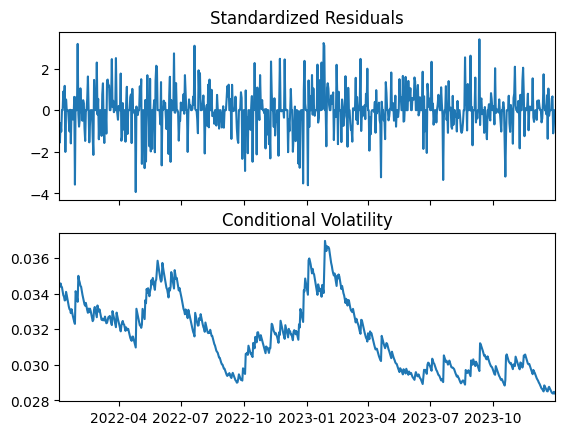

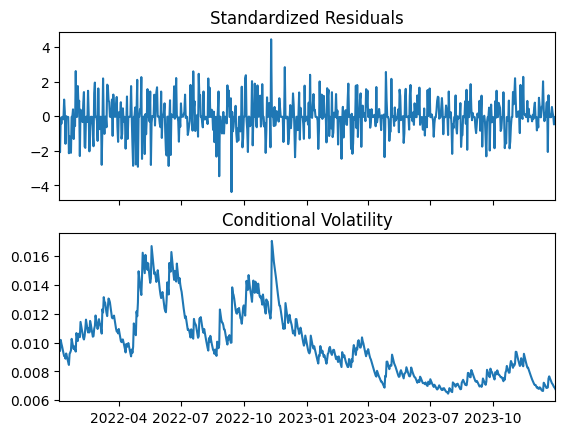

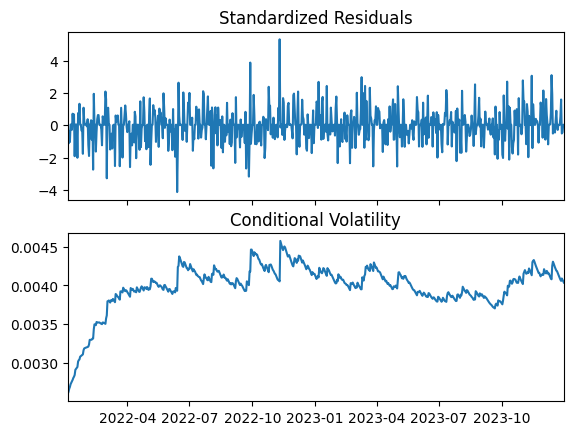

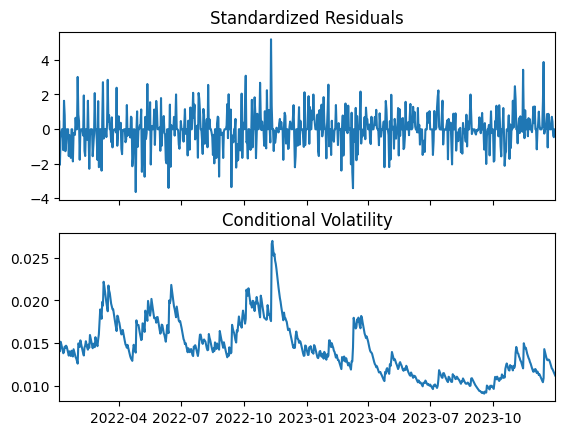

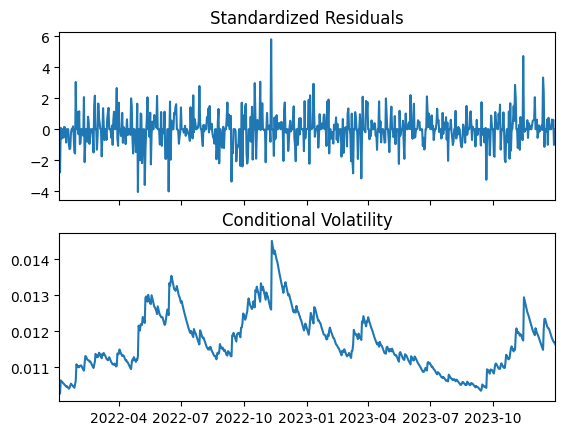

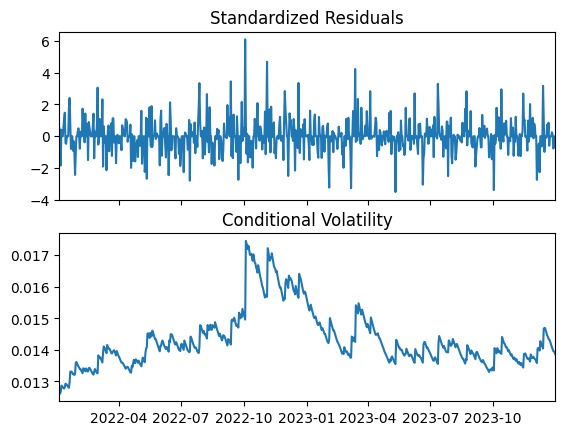

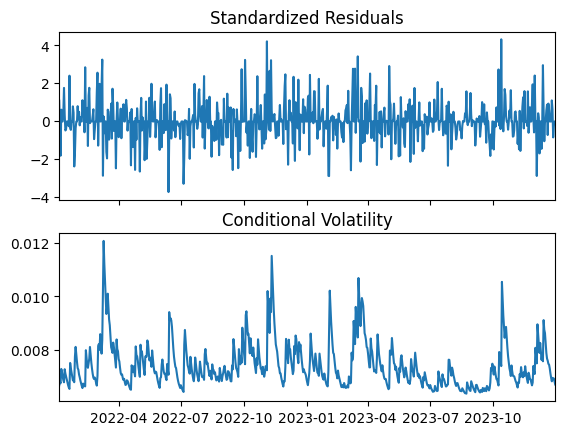

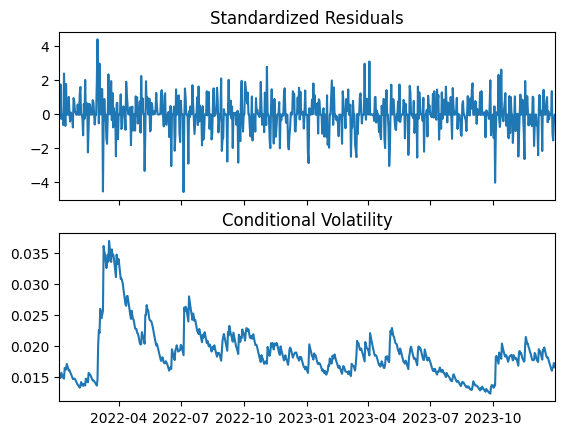

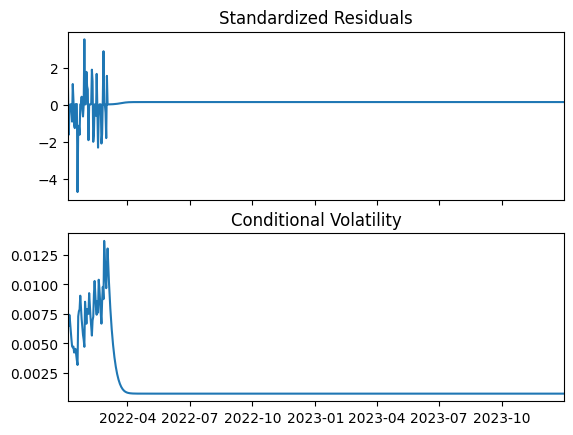

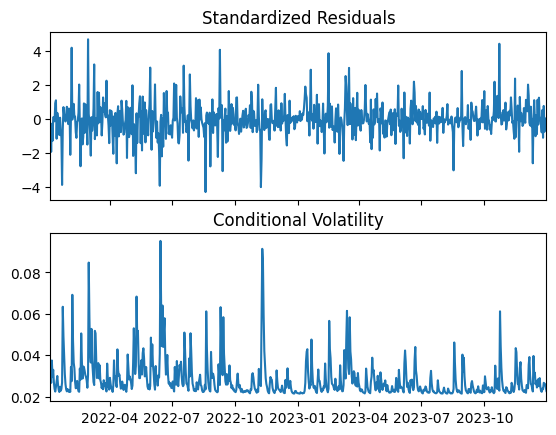

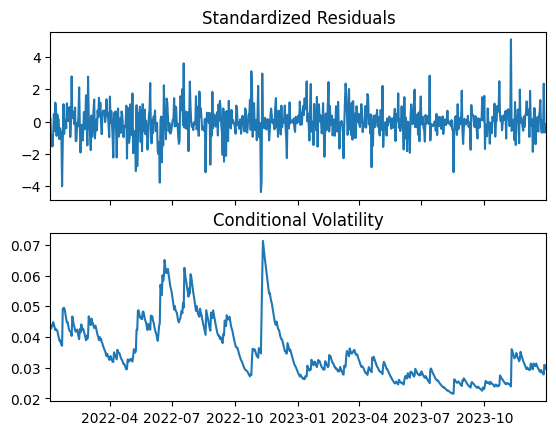

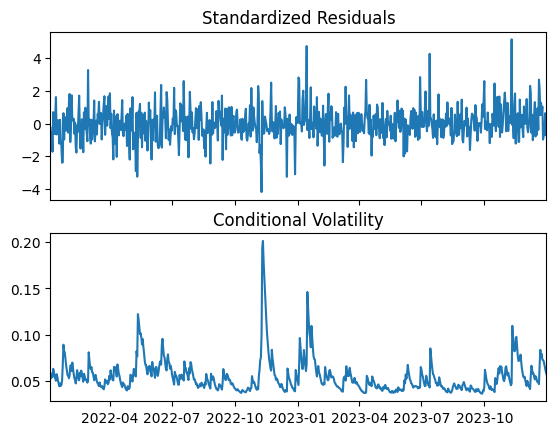

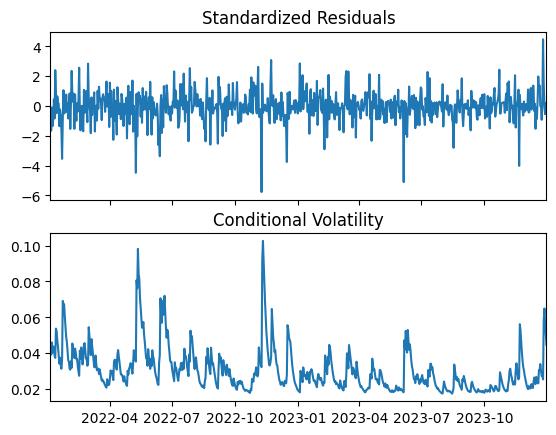

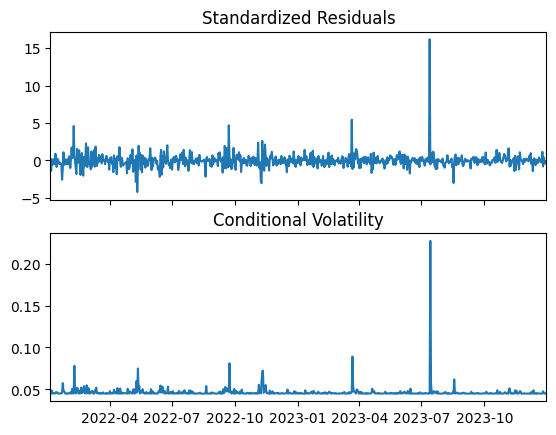

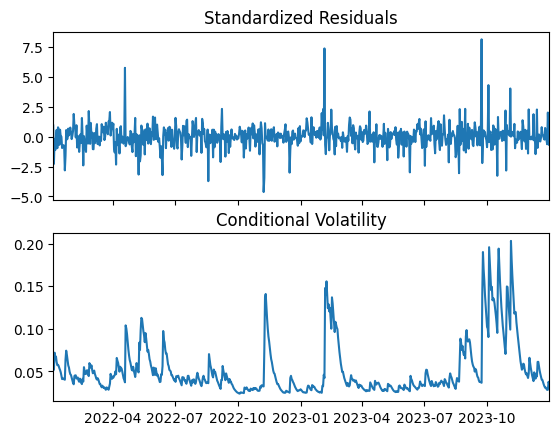

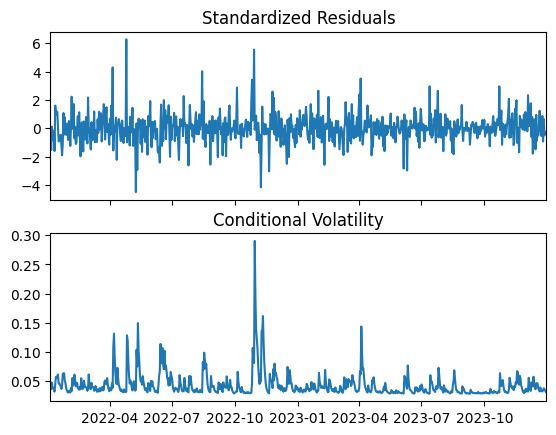

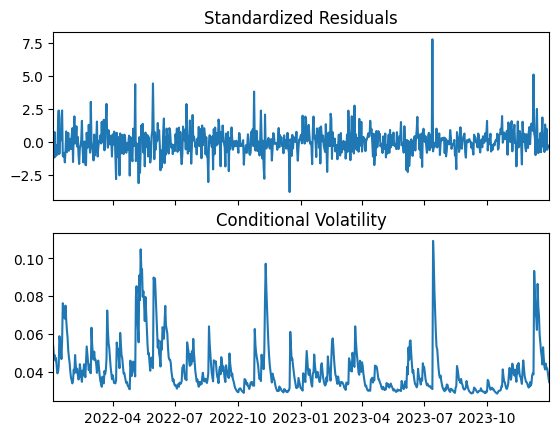

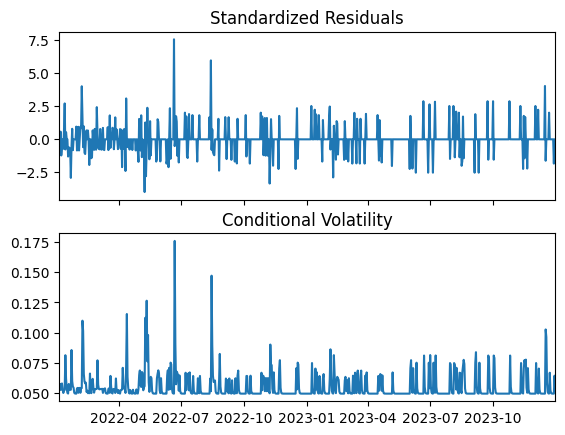

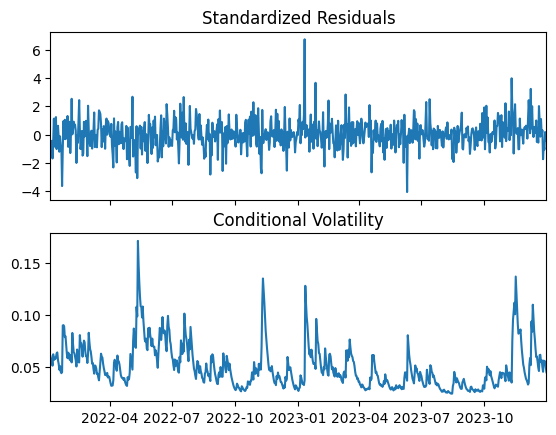

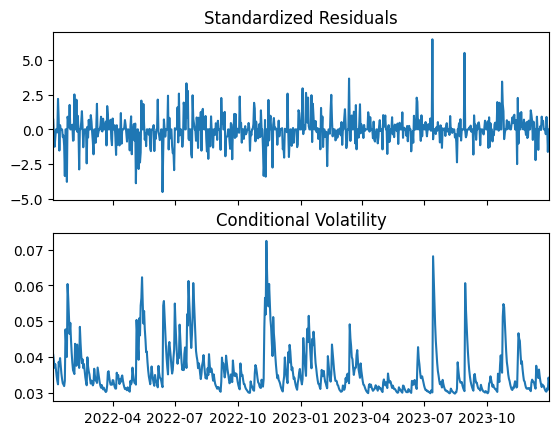

In [5]:
# Fit GARCH model for each asset
for asset in all_assets:
    # Create GARCH model
    model = arch.arch_model(returns[asset], vol='Garch', p=1, q=1)
    
    # Fit model
    results = model.fit(disp='off')
    
    # Print summary
    print(f"\nSummary for {asset}:")
    print(results.summary())
    
    # Plot volatility
    results.plot()
    
    # Calculate AIC and BIC
    aic_values[asset] = results.aic
    bic_values[asset] = results.bic
    
    # Residual analysis
    residuals = results.resid
    residuals_std[asset] = residuals.std()
    
    # Augmented Dickey-Fuller test for residual stationarity
    adf_test = ADF(residuals)
    adf_pvalues[asset] = adf_test.pvalue
    
    # Out-of-sample forecasting
    forecast = results.forecast(horizon=1)
    forecast_errors[asset] = forecast.variance.iloc[-1] - returns[asset][-1]**2


In [6]:
# Display results
print("AIC Values:")
print(aic_values)
print("\nBIC Values:")
print(bic_values)
print("\nStandard Deviation of Residuals:")
print(residuals_std)
print("\nAugmented Dickey-Fuller Test p-values:")
print(adf_pvalues)
print("\nForecast Errors:")
print(forecast_errors)

AIC Values:
{'AAPL': -4104.142250899328, 'MSFT': -3958.4591009811033, 'AMZN': -3527.632538213999, 'GOOGL': -3761.4339803425273, 'TSLA': -2975.2309457432993, 'SPY': -4706.649407382906, 'AGG': -5943.267080168113, 'PSP': -4134.885163607398, 'VNQ': -4397.182815955298, 'SLV': -4097.102349894729, 'GLD': -5061.309177281186, 'USO': -3713.5321794490787, 'DJI': -8670.546027045775, 'BTC-USD': -3158.715890075652, 'ETH-USD': -2872.649474977617, 'SOL-USD': -2203.1373167114816, 'BNB-USD': -3081.4030286150487, 'XRP-USD': -2394.737021474967, 'TON-USD': -2399.471006123933, 'DOGE-USD': -2600.2400980244347, 'ADA-USD': -2626.5607769121043, 'SHIB-USD': -2156.5693826868833, 'AVAX-USD': -2382.2638829285993, 'BITW': -2779.501842155023}

BIC Values:
{'AAPL': -4085.786544989194, 'MSFT': -3940.1033950709693, 'AMZN': -3509.276832303865, 'GOOGL': -3743.0782744323933, 'TSLA': -2956.8752398331653, 'SPY': -4688.293701472772, 'AGG': -5924.911374257979, 'PSP': -4116.529457697264, 'VNQ': -4378.827110045164, 'SLV': -4078.

/Users/ephraim888sun/.pyenv/versions/3.9.6/lib/python3.9/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002303. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/ephraim888sun/.pyenv/versions/3.9.6/lib/python3.9/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002572. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/ephraim888sun

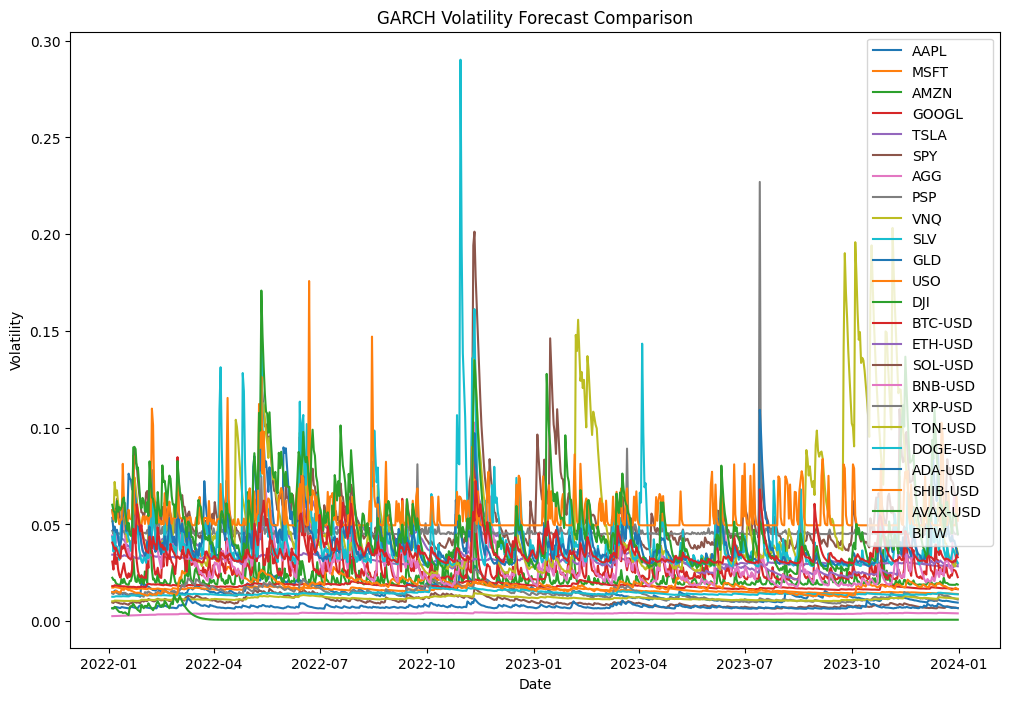

In [7]:
# Initialize a plot
plt.figure(figsize=(12, 8))

# Iterate over each asset
for asset in all_assets:
    # Create GARCH model
    model = arch.arch_model(returns[asset], vol='Garch', p=1, q=1)
    
    # Fit model
    results = model.fit(disp='off')
    
    # Plot volatility forecast
    plt.plot(results.conditional_volatility, label=asset)

# Add labels and legend
plt.title('GARCH Volatility Forecast Comparison')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()

# Show plot
plt.show()

## Metrics

Comparison of GARCH Model Analysis:
                  AIC          BIC  Std. Dev. of Residuals   ADF p-value  \
AAPL     -4104.142251 -4085.786545                0.015185  1.101262e-10   
MSFT     -3958.459101 -3940.103395                0.016048  0.000000e+00   
AMZN     -3527.632538 -3509.276832                0.022235  0.000000e+00   
GOOGL    -3761.433980 -3743.078274                0.018217  0.000000e+00   
TSLA     -2975.230946 -2956.875240                0.031426  3.389710e-17   
SPY      -4706.649407 -4688.293701                0.010198  0.000000e+00   
AGG      -5943.267080 -5924.911374                0.004055  0.000000e+00   
PSP      -4134.885164 -4116.529458                0.014713  3.796380e-14   
VNQ      -4397.182816 -4378.827110                0.011807  0.000000e+00   
SLV      -4097.102350 -4078.746644                0.014428  0.000000e+00   
GLD      -5061.309177 -5042.953471                0.007486  2.703564e-13   
USO      -3713.532179 -3695.176474                0.

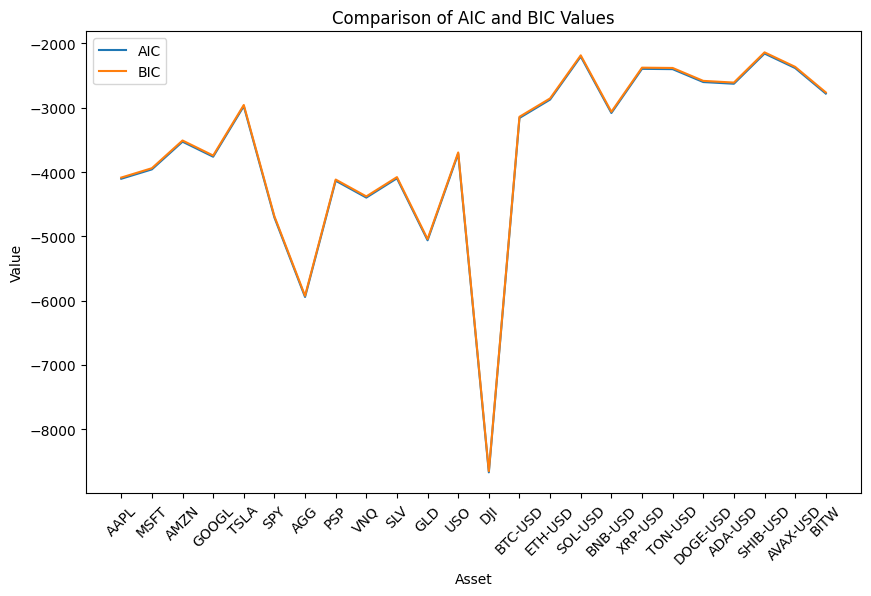

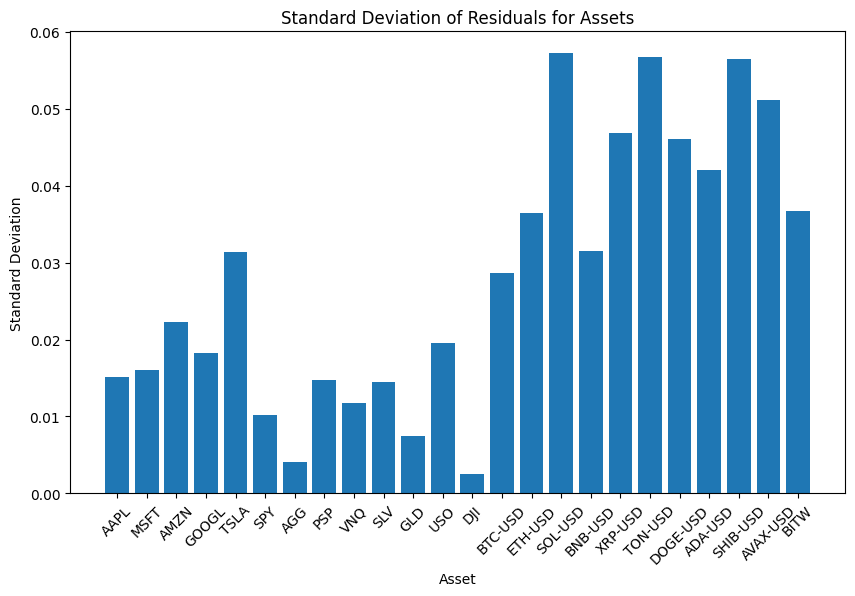

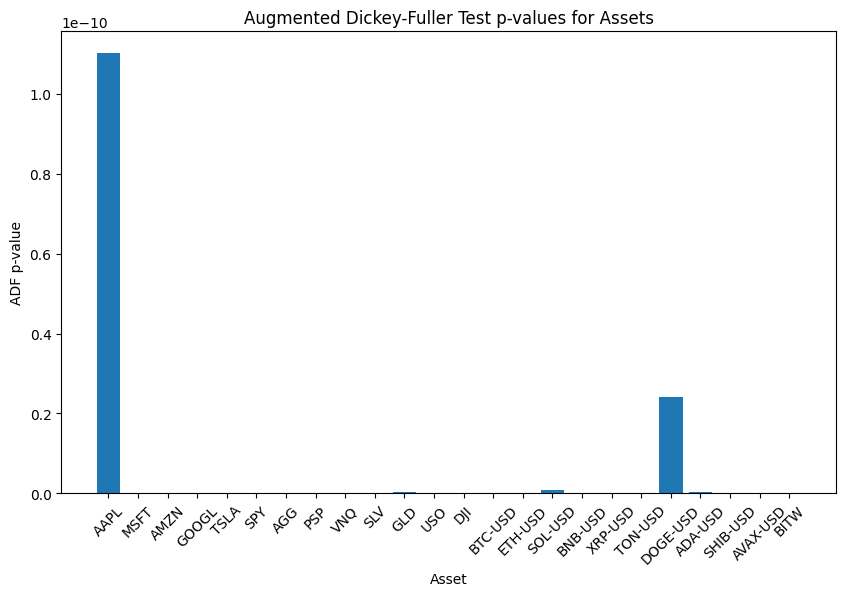

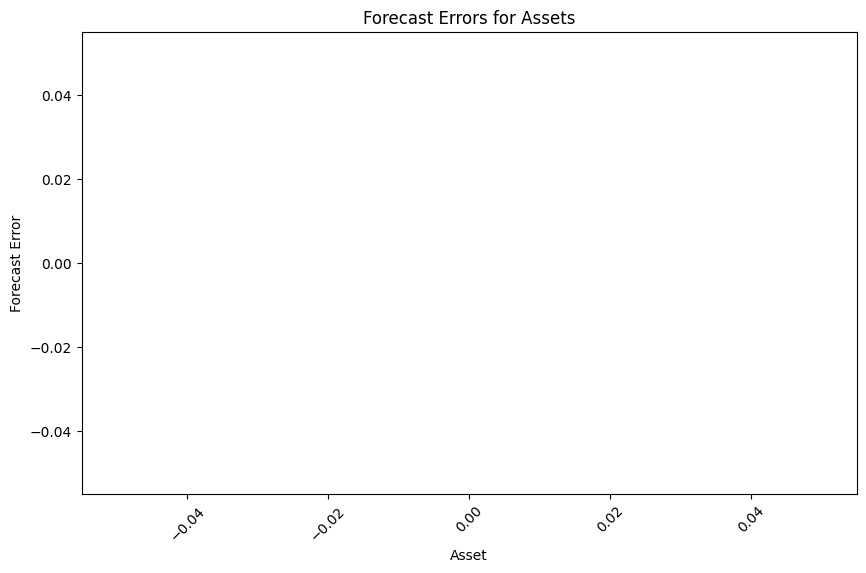

In [9]:
# Convert dictionaries to DataFrame
aic_df = pd.DataFrame.from_dict(aic_values, orient='index', columns=['AIC'])
bic_df = pd.DataFrame.from_dict(bic_values, orient='index', columns=['BIC'])
std_df = pd.DataFrame.from_dict(residuals_std, orient='index', columns=['Std. Dev. of Residuals'])
adf_df = pd.DataFrame.from_dict(adf_pvalues, orient='index', columns=['ADF p-value'])
forecast_errors_df = pd.DataFrame.from_dict(forecast_errors, orient='index', columns=['Forecast Error'])

# Concatenate DataFrames
comparison_df = pd.concat([aic_df, bic_df, std_df, adf_df, forecast_errors_df], axis=1)

# Display DataFrame
print("Comparison of GARCH Model Analysis:")
print(comparison_df)

# Plot AIC and BIC values
plt.figure(figsize=(10, 6))
plt.plot(aic_df, label='AIC')
plt.plot(bic_df, label='BIC')
plt.title('Comparison of AIC and BIC Values')
plt.xlabel('Asset')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Plot Standard Deviation of Residuals
plt.figure(figsize=(10, 6))
plt.bar(std_df.index, std_df['Std. Dev. of Residuals'])
plt.title('Standard Deviation of Residuals for Assets')
plt.xlabel('Asset')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=45)
plt.show()

# Plot Augmented Dickey-Fuller Test p-values
plt.figure(figsize=(10, 6))
plt.bar(adf_df.index, adf_df['ADF p-value'])
plt.title('Augmented Dickey-Fuller Test p-values for Assets')
plt.xlabel('Asset')
plt.ylabel('ADF p-value')
plt.xticks(rotation=45)
plt.show()

# Plot Forecast Errors
plt.figure(figsize=(10, 6))
plt.bar(forecast_errors_df.index, forecast_errors_df['Forecast Error'])
plt.title('Forecast Errors for Assets')
plt.xlabel('Asset')
plt.ylabel('Forecast Error')
plt.xticks(rotation=45)
plt.show()

When AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) values are very close to each other and negative, it indicates that the GARCH model provides a good fit to the data. Both AIC and BIC are information criteria used for model selection, with lower values indicating a better fit.

Here's what it means:

Close Values: When AIC and BIC values are close to each other, it suggests that the model is not penalized much for complexity by using the BIC compared to the AIC. This is often observed when the sample size is large relative to the number of parameters estimated by the model.

Negative Values: Both AIC and BIC can take negative values. Negative values are not inherently problematic and simply indicate the relative goodness of fit of the model. Lower (more negative) values indicate a better fit relative to other models being compared.

Interpretation: In your case, an AIC value of -1457.985088 suggests that the GARCH model provides a very good fit to the data for the given cryptocurrency. The closeness of AIC and BIC values indicates that the model's complexity is adequately balanced with the goodness of fit, suggesting that it may be a suitable model for volatility forecasting for that particular cryptocurrency. However, it's essential to compare these values across different models and cryptocurrencies to make informed decisions about model selection.